In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### 연산장치에서 GPU를 제외하여 CPU만 사용하도록 설정

In [3]:
tf.config.set_visible_devices([], device_type='GPU')

In [4]:
# 위를 실행하지 않으면 결과는 모든 디바이스가 표시
'''
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
'''
# 위를 실행하면 CPU만 표시
'''
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
'''
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
a = tf.constant([1, 2, 3])

# Keras Model API

In [6]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
def ppro(X, tg):
    X = X.astype('float32')
    X = X.reshape(-1, *tg)
    X /= 255
    return X

In [8]:
ppro(X_train, tg=(784, )).shape

(60000, 784)

In [9]:
from tensorflow import keras
from tensorflow.keras import Sequential, layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'), 
    layers.Dense(10, activation='softmax') 
])

In [10]:
## sequential model

In [11]:
model = Sequential()

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.build(input_shape=(None, 784))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
model = Sequential(name="fashion_mnist")
model.add(keras.Input(shape=(784, )))
model.add(layers.Dense(64, activation='relu', name='FC1'))
model.add(layers.Dense(10, activation='softmax', name='output'))
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FC1 (Dense)                 (None, 64)                50240     
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## Funcxtional API

In [14]:
inputs = keras.Input(shape=(784, ), name="mnist_input")
fc1 = layers.Dense(64, activation='relu', name='FC1')
fc2 = layers.Dense(64, activation='relu', name='FC2')
outputs = layers.Dense(10, activation='softmax', name='output')

features = fc1(inputs)
features = fc2(features)
outputs = outputs(features)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mnist_input (InputLayer)    [(None, 784)]             0         
                                                                 
 FC1 (Dense)                 (None, 64)                50240     
                                                                 
 FC2 (Dense)                 (None, 64)                4160      
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


## 다중 입력, 다중 출력 모델 사례

In [15]:
'''
wc = 10000
tc = 100
dc = 4
'''

def create_model(wc, tc, dc):
    title = keras.Input(shape=(wc, ), name='title')
    text_body = keras.Input(shape=(wc, ), name='text_body')
    tags = keras.Input(shape=(tc, ), name='tags')

    features = layers.Concatenate()([title, text_body, tags])
    features = layers.Dense(64, activation='relu')(features)

    prot = layers.Dense(1, activation='sigmoid', name='priority')(features)
    dept = layers.Dense(dc, activation='softmax', name='department')(features)

    model = keras.Model(inputs=[title, text_body, tags], outputs=[prot, dept])
    return model

create_model(wc=10000, tc=100, dc=4).summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

In [16]:
np.random.randint(0, 2, size=(2, 5))

array([[0, 1, 0, 0, 1],
       [1, 1, 1, 0, 0]])

In [17]:
np.random.random(size=(2, 5))  

array([[0.72306989, 0.5445587 , 0.10403795, 0.77866767, 0.16828318],
       [0.44166143, 0.42500658, 0.52506918, 0.10362563, 0.13143113]])

In [18]:
from tensorflow.keras import losses

# 모의 데이터(dummy data)
n_samples = 1280
wc = 10000
tc = 100
dc = 4

# 입력 데이터
title = np.random.randint(0, 2, size=(n_samples, wc))
text_body = np.random.randint(0, 2, size=(n_samples, wc))
tags = np.random.randint(0, 2, size=(n_samples, tc))

# 출력 레이블
prot = np.random.random(size=(n_samples,  1)) # 연속적 값 [0.0, 1.0)
dept = np.random.randint(0, 2, size=(n_samples, dc))

model = create_model(wc, tc, dc)

#model.compile(optimizer='rmsprop', # optimizer=['rmsprop', 'adam'], 오류 발생
#               loss=[losses.mean_squared_error, losses.categorical_crossentropy])
#model.fit([title, text_body, tags], [prot, dept], epochs=1)

model.compile(optimizer='rmsprop', # optimizer=['rmsprop', 'adam'], 오류 발생
              loss={'priority': losses.mean_squared_error, 
                    'department': losses.categorical_crossentropy})

model.fit({'title': title, 'tags': tags, 'text_body': text_body},
          {'priority': prot, 'department': dept}, epochs=1)

40/40 [==============================] - 1s 10ms/step - loss: 29.4433 - priority_loss: 0.3252 - department_loss: 29.1181


#### 다음 설치
- https://graphviz.gitlab.io/download/
    - graphviz-7.1.0 (64-bit) EXE installer [sha256]
- pydot pip 설치
    - pip install pydot

#### pygraphviz는 무엇?
- https://pygraphviz.github.io/documentation/stable/install.html

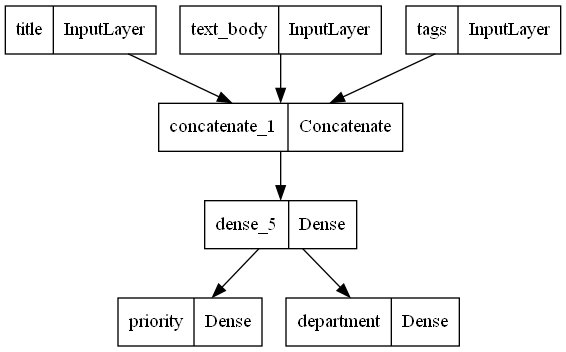

In [19]:
keras.utils.plot_model(model)

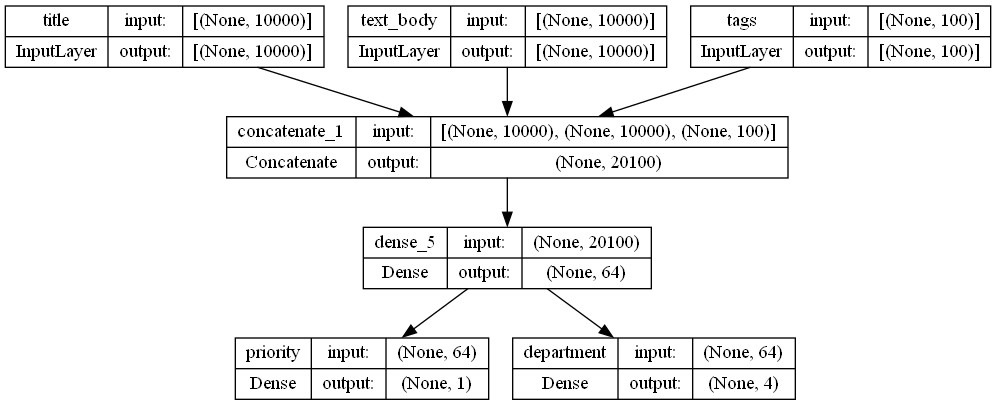

In [20]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [21]:
model.layers

In [22]:
model.layers[3]

In [23]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [24]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_1')>

In [25]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_1')>

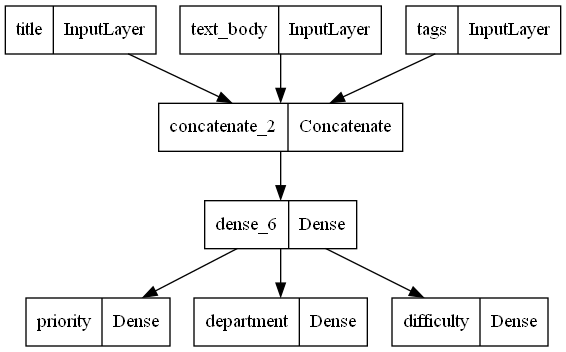

In [27]:
model = create_model(wc=10000, tc=100, dc=4)

features = model.layers[4].output
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)
new_outputs = model.outputs + [difficulty]
new_model = keras.Model(inputs=model.inputs, outputs=new_outputs)

keras.utils.plot_model(new_model)

In [57]:
def create_new_model(features, wc, tc, dc):
    title = keras.Input(shape=(wc, ), name='title')
    text_body = keras.Input(shape=(wc, ), name='text_body')
    tags = keras.Input(shape=(tc, ), name='tags')

    prot = layers.Dense(1, activation='sigmoid', name='priority')(features)
    dept = layers.Dense(dc, activation='softmax', name='department')(features)
    difficulty = layers.Dense(1, activation='softmax', name='difficulty')(features)

    model = keras.Model(inputs=[title, text_body, tags], outputs=[prot, dept, difficulty])
    return model

model = create_model(wc=10000, tc=100, dc=4)
model.layers
features = model.layers[4].output
new_model = create_new_model(features, wc=10000, tc=100, dc=4)

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 10000), dtype=tf.float32, name='title'), name='title', description="created by layer 'title'") at layer "concatenate_10". The following previous layers were accessed without issue: []

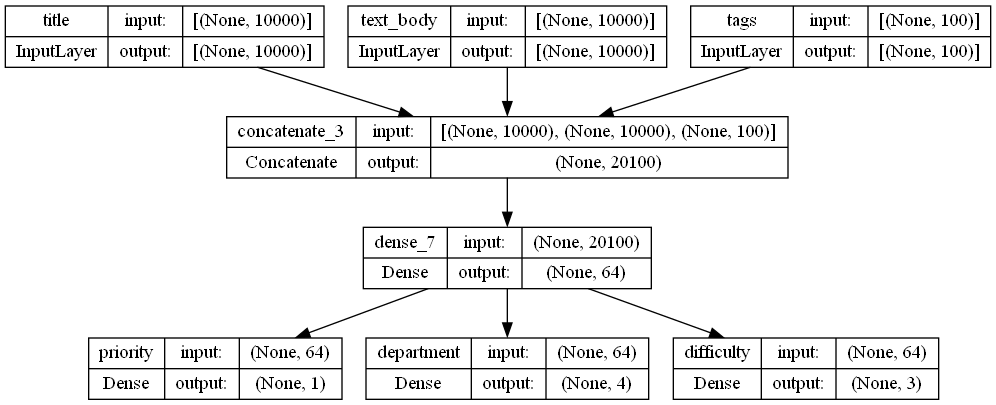

In [33]:
keras.utils.plot_model(new_model, show_shapes=True)

## Vision Deep Learning

In [30]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [31]:
def ppro(X, tg):
    X = X.astype('float32')
    X = X.reshape(-1, *tg)
    X /= 255
    return X

In [32]:
ppro(X_train, tg=(784, )).shape

(60000, 784)

In [33]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [34]:
def create_MLP(hidden_units, input_shape=None):
    model = Sequential()
    if input_shape:
        model.add(keras.Input(shape=input_shape))
    for units in hidden_units:
        model.add(layers.Dense(units, activation='relu'))
    return model    

In [35]:
np.eye(10)[y_train][:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [36]:
mlp = create_MLP(hidden_units=[64, 128], input_shape=(784, ))
mlp.add(layers.Dense(10, activation='softmax'))
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [37]:
from tensorflow.keras import losses, callbacks

mlp = create_MLP(hidden_units=[16], input_shape=(784, ))
mlp.add(layers.Dense(10, activation='softmax'))
mlp.summary()

mlp.compile(loss=losses.sparse_categorical_crossentropy,
            optimizer='adam', 
            metrics=['acc'])
history = mlp.fit(ppro(X_train, tg=(784, )), y_train,
                  epochs=50, batch_size=128, validation_split=0.2, 
                  callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=3)])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                12560     
                                                                 
 dense_12 (Dense)            (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 0.7995 - acc: 0.7385 - val_loss: 0.5447 - val_acc: 0.8133
Epoch 2/50
375/375 [==============================] - 1s 1ms/step - loss: 0.5075 - acc: 0.8276 - val_loss: 0.4781 - val_acc: 0.8352
Epoch 3/50
375/375 [==============================] - 1s 1ms/step - loss: 0.4631 - acc: 0.8424 - val_loss: 0.4531 - val_acc: 0.8467
Epoch 4/50
375/375 [==============================

<Axes: >

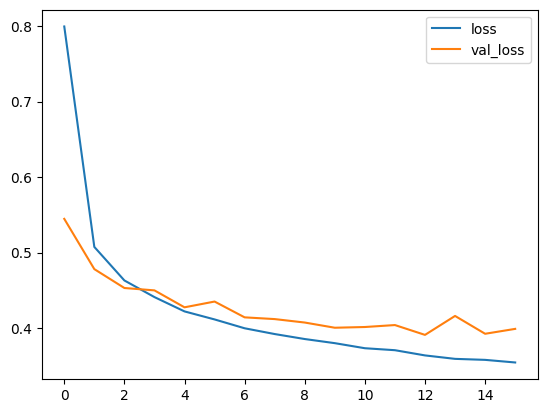

In [38]:
train_results = pd.DataFrame(history.history)
# train_results.plot()
train_results[['loss', 'val_loss']].plot()

In [39]:
train_results[:8]

,loss,acc,val_loss,val_acc
0,0.799545,0.738500,0.544704,0.813333
1,0.507509,0.827563,0.478122,0.835167
2,0.463103,0.842438,0.453107,0.846667
3,0.441068,0.848604,0.449960,0.841833
4,0.422109,0.854042,0.427519,0.852833
5,0.411476,0.858854,0.435163,0.847833
6,0.399755,0.860896,0.414229,0.855750
7,0.392111,0.862042,0.411927,0.855667


In [40]:
loss, acc = mlp.evaluate(ppro(X_test, (784, )), y_test)
print(f'Test: loss={loss:.3f}, Acc.={acc:.2%}')

313/313 [==============================] - 0s 737us/step - loss: 0.4259 - acc: 0.8454
Test: loss=0.426, Acc.=84.54%


In [41]:
## 합성곱 신경망

In [42]:
from tensorflow.keras import layers

def create_ConvNet(input_shape):
    model = Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, activation='relu', kernel_size=(3, 3))
    ])
    return model

In [43]:
convnet = create_ConvNet(input_shape=(28, 28, 1))
convnet.add(layers.Flatten())
convnet.add(layers.Dense(10, activation='softmax'))
convnet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense_13 (Dense)            (None, 10)                216330    
                                                                 
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


In [44]:
from tensorflow.keras import layers

def create_ConvNet(name):
    model = Sequential(name=name)
    model.add(layers.Conv2D(32, activation='relu', kernel_size=(3, 3)))
    return model

In [45]:
convnet_block = create_ConvNet(name='convnet')
convnet_block

In [46]:
model = Sequential()

# 입력
model.add(layers.Input(shape=(28, 28, 1)))
# 합성곱 블록
model.add(convnet_block)

# 출력층
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss=losses.sparse_categorical_crossentropy,
            optimizer='adam', 
            metrics=['acc'])
history = model.fit(ppro(X_train, (28, 28, 1)), y_train,
                  epochs=50, batch_size=128, validation_split=0.2, 
                  callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=3)])


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnet (Sequential)        (None, 26, 26, 32)        320       
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dense_14 (Dense)            (None, 10)                216330    
                                                                 
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
375/375 [==============================] - 5s 11ms/step - loss: 0.4991 - acc: 0.8265 - val_loss: 0.3678 - val_acc: 0.8697
Epoch 2/50
375/375 [==============================] - 4s 11ms/step - loss: 0.3299 - acc: 0.8838 - val_loss: 0.3217 - val_acc: 0.8855
Epoch 3/50
375/375 [==========================

### 발전된 모습

In [47]:
from tensorflow.keras import layers

def create_ConvNet(name):
    model = Sequential(name=name)
    model.add(layers.Conv2D(32, activation='relu', kernel_size=3))
    model.add(layers.MaxPool2D(pool_size=2))
    model.add(layers.Conv2D(64, activation='relu', kernel_size=(3, 3)))
    model.add(layers.MaxPool2D(pool_size=2))
    model.add(layers.Conv2D(128, activation='relu', kernel_size=(3, 3)))
    return model

In [48]:
convnet_block = create_ConvNet(name='convnet')
convnet_block

model = Sequential()

# 입력
model.add(layers.Input(shape=(28, 28, 1)))
# 합성곱 블록
model.add(convnet_block)

# 출력층
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnet (Sequential)        (None, 3, 3, 128)         92672     
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 dense_15 (Dense)            (None, 10)                11530     
                                                                 
Total params: 104,202
Trainable params: 104,202
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss=losses.sparse_categorical_crossentropy,
            optimizer='adam', 
            metrics=['acc'])
history = model.fit(ppro(X_train, (28, 28, 1)), y_train,
                  epochs=50, batch_size=128, validation_split=0.2, 
                  callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/50
375/375 [==============================] - 11s 28ms/step - loss: 0.6256 - acc: 0.7753 - val_loss: 0.4283 - val_acc: 0.8446
Epoch 2/50
375/375 [==============================] - 11s 29ms/step - loss: 0.3855 - acc: 0.8627 - val_loss: 0.3685 - val_acc: 0.8648
Epoch 3/50
375/375 [==============================] - 11s 28ms/step - loss: 0.3361 - acc: 0.8785 - val_loss: 0.3335 - val_acc: 0.8765
Epoch 4/50
375/375 [==============================] - 11s 28ms/step - loss: 0.3045 - acc: 0.8893 - val_loss: 0.2998 - val_acc: 0.8932
Epoch 5/50
375/375 [==============================] - 11s 29ms/step - loss: 0.2790 - acc: 0.9002 - val_loss: 0.2935 - val_acc: 0.8940
Epoch 6/50
375/375 [==============================] - 11s 29ms/step - loss: 0.2623 - acc: 0.9052 - val_loss: 0.2811 - val_acc: 0.8986
Epoch 7/50
375/375 [==============================] - 11s 28ms/step - loss: 0.2438 - acc: 0.9109 - val_loss: 0.2878 - val_acc: 0.8968
Epoch 8/50
375/375 [==============================] - 11s 28ms